# 11_21_SAT A2 박성건 NN, KNN

# NN

In [2]:
#패키지 불러오기 
import pandas as pd 
#데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
#데이터 scaling
from sklearn.preprocessing import StandardScaler
#데이터 분할;train,test
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
#분류SVM
from sklearn.svm import SVC
#최적 모델, 파라미터 검색
from sklearn.model_selection import GridSearchCV
#모델 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, roc_curve, auc ,recall_score, precision_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
df_raw=pd.read_csv("/home/piai/bigdata/data/BigData/유방암.csv")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_raw.isnull().sum() #결측치가 없는것을 확인할 수 있음

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [5]:
df_raw_y = df_raw["diagnosis"] #타겟변수
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False) #설명변수

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)

# 트레인셋에서 다시 트레인셋을 4/7과 3/7로 나눔 그러면 테스트:밸리데이션:테스트=0.4:0.3:0.3 이됨
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
                                                               ,test_size = 3/7, random_state = 1234)
print("train data X size : {}" .format(df_train_x.shape))
print("train data Y size : {}" .format(df_train_y.shape))
print("valid data X size : {}" .format(df_scaled_validation_x.shape))
print("valid data Y size : {}" .format(df_validation_y.shape))
print("test data X size : {}" .format(df_test_x.shape))
print("test data Y size : {}" .format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)


NameError: name 'df_scaled_validation_x' is not defined

In [ ]:
#SCV모델 생성
nn_uncustomized=MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x,df_train_y)
#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
#test 데이터 셋 정확도
print("Accuracy on test set:{:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))

In [ ]:
nn_uncustomized

In [6]:
#train 및 test 설명력 결과 저장
train_accuracy = []
validation_accuracy = []

#hidden_layer_sizes : 은닉층 변경 (20,40,60,80,100,120,140,160)
para_hidden= [hidden * 20 for hidden in range(1,9)]
for v_hidden in para_hidden:
    nn = MLPClassifier(random_state = 1234 , 
             hidden_layer_sizes = v_hidden)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    validation_accuracy.append(nn.score(df_validation_x, df_validation_y))
    
#결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['Trainaccuracy'] = train_accuracy
df_accuracy_hidden['validationaccuracy'] = validation_accuracy
df_accuracy_hidden.round(3)

,HiddenLayer,Trainaccuracy,validationaccuracy
0,20,0.630,0.637
1,40,0.890,0.871
2,60,0.938,0.906
3,80,0.930,0.924
4,100,0.934,0.912
5,120,0.930,0.906
6,140,0.938,0.912
7,160,0.916,0.901


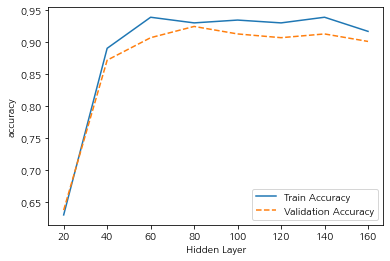

In [7]:
#모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_hidden, validation_accuracy, linestyle = "--", label = 'Validation Accuracy')
plt.xlabel('Hidden Layer')
plt.ylabel('accuracy')
plt.legend()
#그래프를 보면 90정도의 히든 레이어가 적합해 보인다.

In [8]:

#train 및 test 설명력 결과 저장
train_accuracy = []
validation_accuracy = []

#activation 변경
para_function = ['logistic','tanh','relu']

for v_function in para_function:
    nn = MLPClassifier(random_state = 1234 , 
             activation = v_function)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    validation_accuracy.append(nn.score(df_validation_x, df_validation_y))
    
#결과 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['Trainaccuracy'] = train_accuracy
df_accuracy_function['Validationaccuracy'] = validation_accuracy
df_accuracy_function.round(3)

,ActivationFunction,Trainaccuracy,Validationaccuracy
0,logistic,0.921,0.906
1,tanh,0.934,0.912
2,relu,0.934,0.912


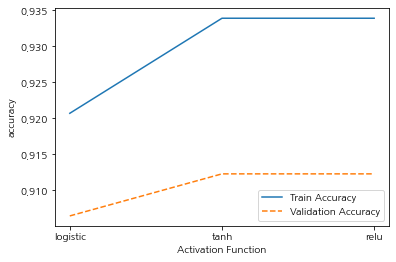

In [9]:
#모델 설명력 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_function, validation_accuracy, linestyle = "--", label = 'Validation Accuracy')
plt.xlabel('Activation Function')
plt.ylabel('accuracy')
plt.legend()
#Activation Function 은 tanh, relu가 logistic보다 정확도가 높다.

In [10]:
#scale 변환 - Standardscaler: 설명변수 scale 변경
#변수명 저장
v_feature_name = df_train_x.columns
#StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [11]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled,test_size = 0.3, random_state = 1234)
df_scaled_train_x, df_scaled_validation_x = train_test_split(df_scaled_train_x, test_size = 0.3/0.7, random_state = 1234)

print("train data X size : {}" .format(df_train_x.shape))
print("train data Y size : {}" .format(df_train_y.shape))
print("valid data X size : {}" .format(df_scaled_validation_x.shape))
print("valid data Y size : {}" .format(df_validation_y.shape))
print("test data X size : {}" .format(df_test_x.shape))
print("test data Y size : {}" .format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
valid data X size : (171, 30)
valid data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [12]:

#scale 조절 후 MLPClassifier 모델 재실행 - scale이 조정된 데이터로 새로운 모델 생성
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
#train 데이터 셋 정확도
print('Accuracy on training set: {:.3f}'.format(nn_scaled.score(df_scaled_train_x, df_train_y)))
print('Accuracy on test set: {:.3f}'.format(nn_scaled.score(df_scaled_test_x, df_test_y)))

Accuracy on training set: 0.996
Accuracy on test set: 0.947


 Hidden Layer: 은닉층 변경

In [13]:
#train 및 test 설명력 결과 저장
train_accuracy = []
validation_accuracy = []

#hidden_layer_sizes : 은닉층 변경 (20~240, by 30)
para_hidden= [20 * hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn = MLPClassifier(random_state = 1234 , 
             hidden_layer_sizes = (v_hidden,v_hidden))
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    validation_accuracy.append(nn.score(df_scaled_validation_x, df_validation_y))
    
#결과 저장
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['Trainaccuracy'] = train_accuracy
df_accuracy_hidden['Testaccuracy'] = validation_accuracy
df_accuracy_hidden.round(3)

,HiddenLayer,Trainaccuracy,Testaccuracy
0,20,0.996,0.965
1,40,0.996,0.977
2,60,1.000,0.965
3,80,1.000,0.977
4,100,1.000,0.971
5,120,1.000,0.953
6,140,1.000,0.965
7,160,1.000,0.953
8,180,1.000,0.959
9,200,1.000,0.953


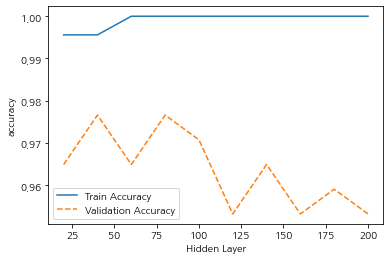

In [14]:
#모델 설명력 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = 'Train Accuracy')
plt.plot(para_hidden, validation_accuracy, linestyle = "--", label = 'Validation Accuracy')
plt.xlabel('Hidden Layer')
plt.ylabel('accuracy')
plt.legend()

In [15]:
#은닉층 지정(임의)
hidden_layer_sizes = 80

In [16]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]; validation_accuracy=[]
#activation 변경
para_function=["logistic","tanh","relu"]
for v_function in para_function:
    nn=MLPClassifier(activation=v_function, hidden_layer_sizes=(80,80), random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_scaled_validation_x,df_validation_y))
# 데이터 테이블로 저장
df_accuracy_function=pd.DataFrame()
df_accuracy_function['MinSamplesSplit']= para_function
df_accuracy_function['TrainAccuracy']=train_accuracy
df_accuracy_function['ValidationAccuracy']=validation_accuracy
# Activation function별 정확도 테이블
df_accuracy_function.round(3)

,MinSamplesSplit,TrainAccuracy,ValidationAccuracy
0,logistic,0.996,0.965
1,tanh,1.000,0.959
2,relu,1.000,0.977


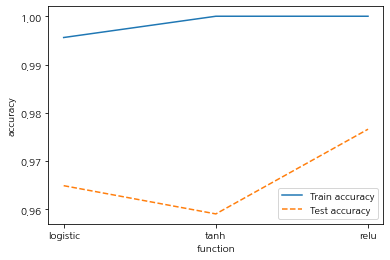

In [17]:
# Activation function별 정확도 그래프 확인
plt.plot(para_function,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_function,validation_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('function')
plt.legend()
# Activation Function 지정(임의)
activation='relu'

In [18]:
#Activation Function 지정 (임의)
activation = 'relu'

In [19]:
# train 및 test 정확도 결과 저장용
train_accuracy=[]
validation_accuracy=[]
# solver 변경
para_solver=['lbfgs','sgd','adam']
for v_solver in para_solver:
    nn=MLPClassifier(solver=v_solver,activation='relu',hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_scaled_validation_x,df_validation_y))
# 데이터 테이블로 저장
df_accuracy_solver=pd.DataFrame()
df_accuracy_solver['Estimators']=para_solver
df_accuracy_solver['TrainScore']=train_accuracy
df_accuracy_solver['TestScore']=validation_accuracy
# Solver별 정확도 테이블
df_accuracy_solver.round(3)

,Estimators,TrainScore,TestScore
0,lbfgs,1.000,0.947
1,sgd,0.996,0.971
2,adam,1.000,0.977


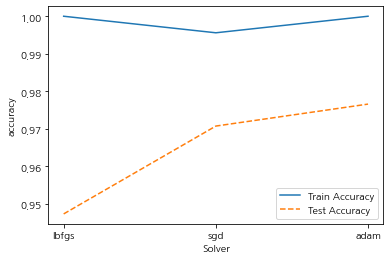

In [20]:
# 정확도 그래프 표현
plt.plot(para_solver,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_solver,validation_accuracy,linestyle='--',label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Solver')
plt.legend()

In [21]:
#Solver 지정(임의)
solver = 'adam'

In [22]:
# train 및 test정확도 결과 저장용
train_accuracy = []
validation_accuracy = []
# Mini Batch 변경 :
para_batch = [20 * batch for batch in range(1,10)]
for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", activation="relu", hidden_layer_sizes = (80,80), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    validation_accuracy.append(nn.score(df_scaled_validation_x, df_validation_y))
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["ValidationAccuracy"] = validation_accuracy
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,ValidationAccuracy
0,20,1.0,0.971
1,40,1.0,0.971
2,60,1.0,0.971
3,80,1.0,0.971
4,100,1.0,0.977
5,120,1.0,0.971
6,140,1.0,0.971
7,160,1.0,0.971
8,180,1.0,0.965


In [23]:
#최종모델
nn_final = MLPClassifier(hidden_layer_sizes = (80,80), activation = 'relu', solver = 'adam', 
                batch_size =100 , random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)

#평가
y_pred = nn_final.predict(df_scaled_test_x)

#train 데이터 셋 정확도
print('Accuracy on training set : {:3f}'.format(nn_final.score(df_scaled_train_x, df_train_y)))

#test 데이터 셋 정확도
print('Accuracy on test set : {:3f}'.format(nn_final.score(df_scaled_test_x, df_test_y)))

#confusion matrix
print('Confusion matrix: \n {}'.format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set : 1.000000
Accuracy on test set : 0.947368
Confusion matrix: 
 [[103   2]
 [  7  59]]


# NN모델도 다른 결정트리 랜덤포레스트, SVM과 마찬가지로 정확도는 90퍼센트 이상이 나왔지만 마찬가지로 악성인데 악성이 아니라고 할 확률이 8/66으로 약 12퍼센트가 된다.

# Confusion matrix를 보면 SVM과 정확히 똑같이 분류한것을 볼 수 있고 정미도와 재현율, F1스코어를 봐도 똑같은 같이 나오는것을 예상할 수 있다.

In [24]:
model_precision_score = precision_score(df_test_y, y_pred)
model_recall = recall_score(df_test_y, y_pred)
model_f1_score = f1_score(df_test_y, y_pred)
print("정밀도:{:.3f}".format(model_precision_score))
print("재현율:{:.3f}".format(model_recall))
print("F1스코어:{:.3f}".format(model_f1_score))

정밀도:0.967
재현율:0.894
F1스코어:0.929


# 결과를 분석해보면 
# 정밀도, 재현율, F1스코어 계산결과
# 정밀도: 0.906, 재현율: 0.879, F1스코어: 0.892으로  SVM과 정확히 똑같다.
# 마찬가지로 이 모델도 유방암 악성을 진단하는데에 충분하지 않은 모델이라고 생각한다.
# 하지만 사람이 악성을 악성이 아니라고 할 확률이 87.9퍼센트 이하라고 한다면 이 모델도 사용될 수 있다고 생각한다.

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [26]:
df_raw=pd.read_csv("/home/piai/bigdata/data/BigData/유방암.csv")
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [99]:
df_raw_y = df_raw["diagnosis"] #타겟변수
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False) #설명변수

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y
                                                               ,test_size = 0.3, random_state = 1234)

# 트레인셋에서 다시 트레인셋을 4/7과 3/7로 나눔 그러면 테스트:밸리데이션:테스트=0.4:0.3:0.3 이됨
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y
                                                               ,test_size = 3/7, random_state = 1234)
print("train data X size : {}" .format(df_train_x.shape))
print("train data Y size : {}" .format(df_train_y.shape))
print("valid data X size : {}" .format(df_scaled_validation_x.shape))
print("valid data Y size : {}" .format(df_validation_y.shape))
print("test data X size : {}" .format(df_test_x.shape))
print("test data Y size : {}" .format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
valid data X size : (171, 30)
valid data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [100]:
#KNN 모델 생성(default 설정)
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)
#train 데이터 셋 정확도
print("Accuracy on training set:{:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on validation set:{:.3f}".format(knn_uncustomized.score(df_validation_x, df_validation_y)))

Accuracy on training set:0.956
Accuracy on validation set:0.918


In [101]:
knn_uncustomized

KNeighborsClassifier()

In [102]:
#train 및 test 정확도 결과 저장용
train_accuracy = []; validation_accuracy = []
#최대 이웃 수 : 1 ~ 15
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    validation_accuracy.append(knn.score(df_validation_x, df_validation_y))

#데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuacy"] = train_accuracy
df_accuracy_neighbors["ValidationAccuacy"] = validation_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuacy,ValidationAccuacy
0,1,1.000,0.901
1,2,0.965,0.906
2,3,0.960,0.918
3,4,0.952,0.924
4,5,0.956,0.918
5,6,0.943,0.918
6,7,0.960,0.918
7,8,0.952,0.924
8,9,0.952,0.924
9,10,0.943,0.918


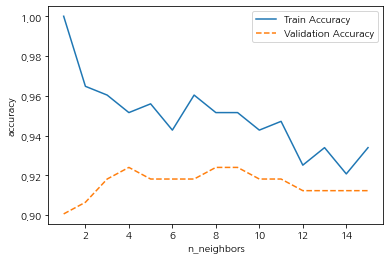

In [103]:
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_neighbors, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.ylabel("accuracy");plt.xlabel("n_neighbors")
plt.legend()



In [104]:
n_neigthbors = 4
#군집은 4개 단위로 이루어지게 설정

In [105]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
validation_accuracy =[]

## 두개의 파라미터

#이웃 수
para_n_neighbors = [i for i in range(1,11)]*2
#가중치(uniform, distance)
para_weights = (["uniform"]) * 10 + (["distance"] * 10 )
#zip(list1, list2, ...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
#1번 loop: n_neighbors = para_n_neighbors[0], weights =para_weights[0]
#2번 loop: n_neighbors = para_n_neighbors[1], weights =para_weights[1]

for (v_n_neighbors, v_weights) in zip(para_n_neighbors , para_weights):
    knn = KNeighborsClassifier(n_neighbors= v_n_neighbors, weights= v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    validation_accuracy.append(knn.score(df_validation_x, df_validation_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["ValidationAccuracy"] = validation_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,ValidationAccuracy
0,1,uniform,1.000,0.901
1,2,uniform,0.965,0.906
2,3,uniform,0.960,0.918
3,4,uniform,0.952,0.924
4,5,uniform,0.956,0.918
5,6,uniform,0.943,0.918
6,7,uniform,0.960,0.918
7,8,uniform,0.952,0.924
8,9,uniform,0.952,0.924
9,10,uniform,0.943,0.918


In [109]:
#그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors', columns = 'Weights',\
                                                      values = ['TrainAccuracy', 'ValidationAccuracy'])
df_accuracy_weights_pivot

#pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '_' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,ValidationAccuracy_distance,ValidationAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.900585,0.900585
2,1.0,0.964758,0.900585,0.906433
3,1.0,0.960352,0.923977,0.918129
4,1.0,0.951542,0.918129,0.923977
5,1.0,0.955947,0.912281,0.918129


<AxesSubplot:xlabel='Neighbors'>

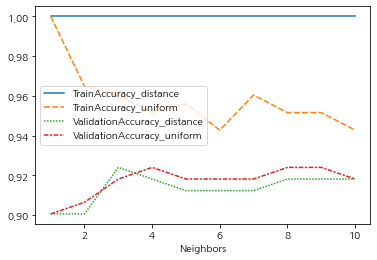

In [110]:
# 그래프 생성, 변수별 linestyle 구분
sns.lineplot(data = df_accuracy_weights_pivot)

In [111]:
#최종모델
knn_model = KNeighborsClassifier(n_neighbors=4,weights="uniform",metric="manhattan")
knn_model.fit(df_train_x,df_train_y)
#평가
y_pred=knn_model.predict(df_test_x)

#train 데이터 셋 정확도
print("train data accuracy:{0:.3f}".format(knn_model.score(df_train_x,df_train_y)))
#test 데이터 셋 정확도
print("validation data accuracy:{0:.3f}".format(knn_model.score(df_validation_x,df_validation_y)))
#confusion matrix
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

train data accuracy:0.960
validation data accuracy:0.924
Confusion matrix:
[[103   2]
 [  7  59]]


In [112]:
model_precision_score = precision_score(df_test_y, y_pred)
model_recall = recall_score(df_test_y, y_pred)
model_f1_score = f1_score(df_test_y, y_pred)

In [113]:
print("정밀도:{:.3f}".format(model_precision_score))
print("재현율:{:.3f}".format(model_recall))
print("F1스코어:{:.3f}".format(model_f1_score))

정밀도:0.967
재현율:0.894
F1스코어:0.929


# KNN의 정밀도는 0.967, 재현율은 0.894, F1스코어는 0.929로
# 다른 모델들에 비해 성능이 가장 좋다고 할 수 있다.
# 하지만 여전히 악성을 악성이 아니라고 할 확률은 약 10.6퍼센트로
# 악성을 판별하는 모델로 사용되기 위해서는 충분하지 않은 모델이라고 생각한다.